<a id='Top'></a>
# Exploring Electric Vehicle Rebate Data
## Capstone: Masters in Data, Analytics, and Visualization
#### Alan Leidner Aug 14, 2022

# Introduction
As an independent project, I explored data related to the rebates of electric vehicles (EVs). This notebook was used primarily to explore and analyze the time series of rebate programs in different states.

Data for this notebook comes from:
* California: https://cleanvehiclerebate.org/eng/rebate-statistics
* New York: https://www.nyserda.ny.gov/All-Programs/Drive-Clean-Rebate/Rebate-Data/Rebate-Stats
* Massachusetts: https://mor-ev.org/program-statistics

# Data Exploration
First, I will import the data from California's rebate program.

In [1]:
import pandas as pd
caev = pd.read_csv(r'/Users/leidner/Desktop/Capstone/CVRPStats.csv')
pd.set_option('display.max_columns', None) #expands df to display all columns
caev.head(5)

,ID,Consumer Type,Rebate Dollars,Application Date,Vehicle Category,Vehicle Make,Air District,County,ZIP,Electric Utility,Census Tract,CES 2.0 DAC Census Tracts,CES 3.0 DAC Census Tracts,DAC ZIP Code (CES 2.0),Low-Income Community,CA Senate District,CA Assembly District,Grant Number,Funding Source,Low-/Moderate-Income Increased Rebate,Increased Rebates for Public Fleets in DACs
0,A-017223,Individual,5000.0,3/18/10 1:00,BEV,Tesla,Bay Area,Santa Clara,94306,City of Palo Alto,6085511500,0,0,0,0,13,24,G09-AQIP-02,ARB,0,0
1,A-032769,Individual,5000.0,3/18/10 1:00,BEV,Tesla,Bay Area,San Mateo,94002,Pacific Gas & Electric Company,6081608700,0,0,0,0,13,22,G09-AQIP-02,ARB,0,0
2,A-001967,Individual,5000.0,3/20/10 1:00,BEV,Tesla,South Coast,Los Angeles,91326,Los Angeles Department of Water & Power,6037108202,0,0,0,0,27,38,G09-AQIP-02,ARB,0,0
3,A-020605,Individual,5000.0,3/31/10 1:00,BEV,Tesla,North Coast Unified,Humboldt,95501,Pacific Gas & Electric Company,6023000600,0,0,0,1,2,2,G09-AQIP-02,ARB,0,0
4,A-041358,Individual,5000.0,4/1/10 1:00,BEV,Tesla,Ventura,Ventura,91360,Southern California Edison,6111006800,0,0,0,0,27,44,G09-AQIP-02,ARB,0,0


In [2]:
#trying to get a general sense of the data set
caev.shape

(464465, 21)

In [3]:
#preliminary statistics from the dataframe
caev.describe()

,Rebate Dollars,ZIP,Census Tract,CES 2.0 DAC Census Tracts,CES 3.0 DAC Census Tracts,DAC ZIP Code (CES 2.0),Low-Income Community,CA Senate District,CA Assembly District,Low-/Moderate-Income Increased Rebate,Increased Rebates for Public Fleets in DACs
count,464465.000000,464465.000000,4.644650e+05,464465.000000,464465.000000,464465.000000,464465.000000,464465.000000,464465.000000,464465.000000,464465.000000
mean,2306.674241,93004.973328,6.055083e+09,0.087520,0.087585,0.435990,0.195072,21.117865,41.815534,0.071626,0.001496
std,864.497564,1713.204230,2.737597e+07,0.282596,0.282690,0.495886,0.396256,11.400222,22.736812,0.257869,0.038654
min,0.000000,90001.000000,6.001400e+09,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1500.000000,91711.000000,6.037302e+09,0.000000,0.000000,0.000000,0.000000,11.000000,23.000000,0.000000,0.000000
50%,2500.000000,92708.000000,6.059053e+09,0.000000,0.000000,0.000000,0.000000,22.000000,41.000000,0.000000,0.000000
75%,2500.000000,94566.000000,6.075025e+09,0.000000,0.000000,1.000000,0.000000,30.000000,65.000000,0.000000,0.000000
max,20000.000000,96161.000000,6.115041e+09,1.000000,1.000000,1.000000,1.000000,40.000000,80.000000,1.000000,1.000000


The only useful summary statistics here seem to be from the `Rebate Dollars` column.

In [4]:
#sanity check to verify that there are no null values
caev.isnull().sum().sum()

0

In [5]:
#sanity check to verify that there are no duplicate values
caev['ID'].duplicated().sum()

0

In [6]:
#Removing spaces in column names now to prevent formating problems while calling functions
caev.columns = caev.columns.str.replace(' ', '')
caev.head(1)

,ID,ConsumerType,RebateDollars,ApplicationDate,VehicleCategory,VehicleMake,AirDistrict,County,ZIP,ElectricUtility,CensusTract,CES2.0DACCensusTracts,CES3.0DACCensusTracts,DACZIPCode(CES2.0),Low-IncomeCommunity,CASenateDistrict,CAAssemblyDistrict,GrantNumber,FundingSource,Low-/Moderate-IncomeIncreasedRebate,IncreasedRebatesforPublicFleetsinDACs
0,A-017223,Individual,5000.0,3/18/10 1:00,BEV,Tesla,Bay Area,Santa Clara,94306,City of Palo Alto,6085511500,0,0,0,0,13,24,G09-AQIP-02,ARB,0,0


Adding a custom function to analyze distrbutions of variables.

In [7]:
def distbox (i,df , type = 'numeric',normalize=True):
  """ 
  This function is designed to provide distribution statics and visualizations of dataframe columns
  it takes in a column number and dataframe and can return:
   numerical output -
            1. the skewness of the column
            2. the kurtosis or spread
            3. the descriptive statistics from .describe()
            4. a histogram and boxplot
            
  OR categorical -        
            1. countplot
            2. values counts (either count or as percentages)
  """
  #best practice import dependencies in functions
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  import warnings 
  warnings.filterwarnings("ignore", category=FutureWarning)
  c = df.iloc[:,i]
  plt.figure(figsize=(8,4))
  if type =='numeric':
    plt.subplot(1,2,1);#Histogram location
    sns.distplot(c);#calls a histogram
    plt.title(df.columns[i]);#adds title
    plt.subplot(1,2,2);#Boxplot location
    sns.boxplot(c);#calls a box and whisket plot
    plt.title(df.columns[i]);#adds title
    print("Skewness: %f" %c.skew()) #Adds Skew value
    # If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
    # If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
    # If the skewness is less than -1 or greater than 1, the data are highly skewed
    print("Kurtosis: %f" %c.kurt(skipna = True)) #Adds Kurtosis value (tail-ness)
    # While kurtosis determines the heaviness of the distribution tails.
    # Kurtosis > 3 thin and not spread
    # Kurtosis <3 moderate spread
    print(c.describe()) #Adds summary statistics of the variable


  elif type == 'categorical':
    sns.countplot(c)
    plt.title(df.columns[i]);#adds title
    print(c.value_counts(normalize=normalize))

  print("Nullcount: %f" %c.isnull().sum().sum())
  plt.show() # this will load image to console before executing next line of code

Skewness: 2.362830
Kurtosis: 21.643973
count    464465.000000
mean       2306.674241
std         864.497564
min           0.000000
25%        1500.000000
50%        2500.000000
75%        2500.000000
max       20000.000000
Name: RebateDollars, dtype: float64
Nullcount: 0.000000


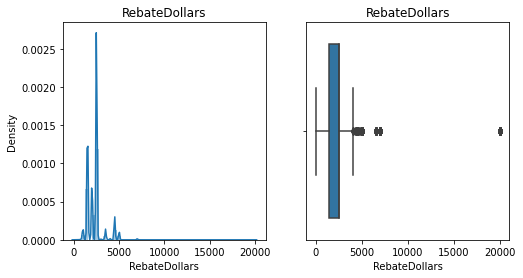

In [8]:
#this is the only visualization I kept in the notebook. Others were interesting, but not relavent to my project.
distbox(2,caev)

# Differences between CA and NY
Did New Yorks Rebate counts differ from California's after California instituted their Low Income Requirements (LIR) on 3/29/16?

In [9]:
#datetime formats were not standardized on import. It was faster to do a workaround with `str` format than to fix
caev['ApplicationDate'] = caev['ApplicationDate'].str[:-5]

In [10]:
#do I now have the datetime in a usable format?
caev['ApplicationDate'].head()

0    3/18/10
1    3/18/10
2    3/20/10
3    3/31/10
4     4/1/10
Name: ApplicationDate, dtype: object

In [11]:
#count after low income requirements implemented
ca_after_lir = len(caev[caev['ApplicationDate'] >= '2016-03-29'])

In [12]:
#count before low income requirements implemented
ca_before_lir = len(caev[caev['ApplicationDate'] < '2016-03-29'])

## Importing NY data

In [14]:
nyev = pd.read_csv(r'/Users/leidner/Desktop/Capstone/NYSEV Subsidies.csv')
nyev.head(5)

,Data through Date,Submitted Date,Make,Model,County,ZIP,EV Type,Transaction Type,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
0,03/31/2022,10/08/2020,Tesla,Model 3,NaN,10549,BEV,Purchase,2.99,592.89,2000.0
1,03/31/2022,10/09/2020,Nissan,LEAF,NaN,14623,BEV,Lease,2.91,592.89,2000.0
2,03/31/2022,10/14/2020,Tesla,Model X,NaN,10956,BEV,Purchase,2.52,592.89,500.0
3,03/31/2022,10/21/2020,Tesla,Model X,NaN,11747,BEV,Lease,2.52,592.89,500.0
4,03/31/2022,10/21/2020,Tesla,Model Y,NaN,10014,BEV,Purchase,3.07,592.89,2000.0


In [15]:
#trying to get a general sense of the data set
nyev.shape

(65491, 11)

In [16]:
#We will remove any  spaces now to prevent formating problems while calling functions.
nyev.columns = nyev.columns.str.replace(' ', '')
nyev.head(1)

,DatathroughDate,SubmittedDate,Make,Model,County,ZIP,EVType,TransactionType,AnnualGHGEmissionsReductions(MTCO2e),AnnualPetroleumReductions(gallons),RebateAmount(USD)
0,03/31/2022,10/08/2020,Tesla,Model 3,NaN,10549,BEV,Purchase,2.99,592.89,2000.0


In [17]:
#grouping by count for visualization. 
#I removed this and next cells from notebook to help with load times, as they did not affect my project
#nyev['count'] = nyev.groupby('SubmittedDate')['SubmittedDate'].transform('count')
#nyev.head()

In [18]:
#create lineplot
#nylp = pd.DataFrame().assign(SubmittedDate=nyev['SubmittedDate'],count=nyev['count'])
#nylp.drop_duplicates(inplace=True)
#nylp.head()

In [19]:
#nylp.info()

In [20]:
import seaborn as sns
#sns.lineplot(data=nylp, x="SubmittedDate", y="count")

In [21]:
#count before low income requirements implemented
ny_before_lir = len(nyev[nyev['SubmittedDate'] < '03/29/2016'])
ny_before_lir

19045

In [22]:
#count after low income requirements implemented
ny_after_lir = len(nyev[nyev['SubmittedDate'] > '03/29/2016'])
ny_after_lir

46446

In [23]:
#create lineplot
caev['count'] = caev.groupby('ApplicationDate')['ApplicationDate'].transform('count')
caev.head()

,ID,ConsumerType,RebateDollars,ApplicationDate,VehicleCategory,VehicleMake,AirDistrict,County,ZIP,ElectricUtility,CensusTract,CES2.0DACCensusTracts,CES3.0DACCensusTracts,DACZIPCode(CES2.0),Low-IncomeCommunity,CASenateDistrict,CAAssemblyDistrict,GrantNumber,FundingSource,Low-/Moderate-IncomeIncreasedRebate,IncreasedRebatesforPublicFleetsinDACs,count
0,A-017223,Individual,5000.0,3/18/10,BEV,Tesla,Bay Area,Santa Clara,94306,City of Palo Alto,6085511500,0,0,0,0,13,24,G09-AQIP-02,ARB,0,0,2
1,A-032769,Individual,5000.0,3/18/10,BEV,Tesla,Bay Area,San Mateo,94002,Pacific Gas & Electric Company,6081608700,0,0,0,0,13,22,G09-AQIP-02,ARB,0,0,2
2,A-001967,Individual,5000.0,3/20/10,BEV,Tesla,South Coast,Los Angeles,91326,Los Angeles Department of Water & Power,6037108202,0,0,0,0,27,38,G09-AQIP-02,ARB,0,0,1
3,A-020605,Individual,5000.0,3/31/10,BEV,Tesla,North Coast Unified,Humboldt,95501,Pacific Gas & Electric Company,6023000600,0,0,0,1,2,2,G09-AQIP-02,ARB,0,0,1
4,A-041358,Individual,5000.0,4/1/10,BEV,Tesla,Ventura,Ventura,91360,Southern California Edison,6111006800,0,0,0,0,27,44,G09-AQIP-02,ARB,0,0,1


In [24]:
calp = pd.DataFrame().assign(SubmittedDate=caev['ApplicationDate'],count=caev['count'])
calp.drop_duplicates(inplace=True)
calp.head()

,SubmittedDate,count
0,3/18/10,2
2,3/20/10,1
3,3/31/10,1
4,4/1/10,1
5,4/3/10,1


In [25]:
calp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7208 entries, 0 to 464344
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SubmittedDate  7208 non-null   object
 1   count          7208 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 168.9+ KB


In [26]:
print(f"ny_before_lir= {ny_before_lir}")
print(f"ca_before_lir= {ca_before_lir}")
print(f"ny_after_lir= {ny_after_lir}")#how is this right? 
print(f"ca_after_lir= {ca_after_lir}")

ny_before_lir= 19045
ca_before_lir= 199982
ny_after_lir= 46446
ca_after_lir= 264483


In [27]:
print(f"California Increase = %{(ca_after_lir/ca_before_lir*100)}")
print(f"New York Increase = %{(27401/ny_before_lir*100)}")

California Increase = %132.25340280625258
New York Increase = %143.87503281701234


This seems like a good arguement against implementing the LIR. However, NY started their rebate a year before the LIR was implemented in CA. Perhaps we should look toward another state with an EV rebate program, that started a bit earlier.

Rebate Start Dates
* CA: 2010
* CA-LIR: 2016
* NY: 2017
* MA: 2014

# Import Massachusetts Data

In [28]:
maev = pd.read_csv(r'/Users/leidner/Desktop/Capstone/MOR-EV.csv')
maev.head(5)

,Application Number,Total Amount,Application Received Date,Vehicle Category,Vehicle Model,Vehicle Year,Date of Purchase,Purchase or Lease?,Zip Code,County
0,CSE-0029862,"$2,500",9/28/2021,BEV,Volkswagen ID.4 1st Edition,2021,9/23/2021,Purchased,2474,Middlesex
1,CSE-0029864,"$2,500",9/28/2021,BEV,Tesla Model 3,2021,9/25/2021,Leased,2038,Norfolk
2,CSE-0029885,"$1,500",9/28/2021,PHEV,Toyota RAV4 Prime,2021,9/17/2021,Purchased,1845,Essex
3,CSE-0029895,"$2,500",9/28/2021,BEV,Tesla Model 3,2021,9/17/2021,Purchased,2130,Suffolk
4,CSE-0029901,"$1,500",9/28/2021,PHEV,Toyota RAV4 Prime,2021,8/28/2021,Purchased,1752,Middlesex


In [29]:
#We will remove any  spaces now to prevent formating problems while calling functions.
maev.columns = maev.columns.str.replace(' ', '')
maev.head()

,ApplicationNumber,TotalAmount,ApplicationReceivedDate,VehicleCategory,VehicleModel,VehicleYear,DateofPurchase,PurchaseorLease?,ZipCode,County
0,CSE-0029862,"$2,500",9/28/2021,BEV,Volkswagen ID.4 1st Edition,2021,9/23/2021,Purchased,2474,Middlesex
1,CSE-0029864,"$2,500",9/28/2021,BEV,Tesla Model 3,2021,9/25/2021,Leased,2038,Norfolk
2,CSE-0029885,"$1,500",9/28/2021,PHEV,Toyota RAV4 Prime,2021,9/17/2021,Purchased,1845,Essex
3,CSE-0029895,"$2,500",9/28/2021,BEV,Tesla Model 3,2021,9/17/2021,Purchased,2130,Suffolk
4,CSE-0029901,"$1,500",9/28/2021,PHEV,Toyota RAV4 Prime,2021,8/28/2021,Purchased,1752,Middlesex


In [30]:
#count before low income requirements implemented
ma_before_lir = len(maev[maev['ApplicationReceivedDate'] < '3/29/2016'])
ma_before_lir

12148

In [31]:
#count before low income requirements implemented
ma_after_lir = len(maev[maev['ApplicationReceivedDate'] >= '3/29/2016'])
ma_after_lir

12985

In [36]:
print(f"ma_before_lir= {ma_before_lir}")
print(f"ma_after_lir= {ma_after_lir}")

ma_before_lir= 12148
ma_after_lir= 12985


In [35]:
print(f"California Increase = %{(ca_after_lir/ca_before_lir*100)}")
print(f"Mass Increase = %{(ma_after_lir/ma_before_lir*100)}")
print(f"New York Increase = %{(27401/ny_before_lir*100)}")

California Increase = %132.25340280625258
Mass Increase = %106.89002304906157
New York Increase = %143.87503281701234


# Conclusion
This notebook isn't definitive, nor is it meant to be. It does however suggest that California's Low Income Requirements for their rebate program may increase EV sales in the state. See https://www.nber.org/papers/w25771 for more details.

<br><div style="text-align: right">[Begining of the page](#Top)</div>